In [13]:
import math
import warnings

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression

%matplotlib inline
sns.set_style('white')

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

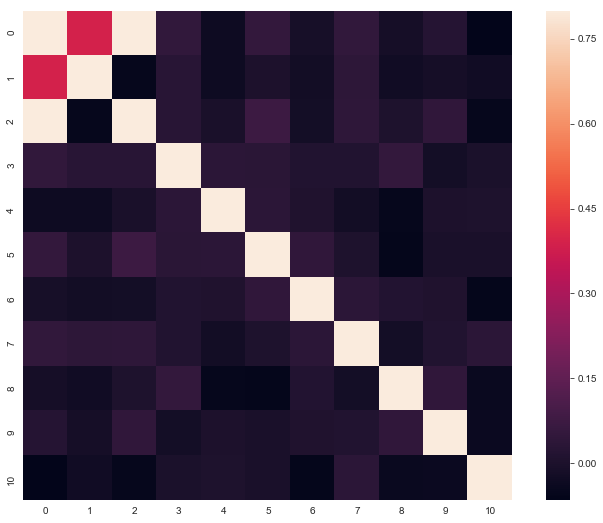

In [14]:
# Number of datapoints in outcome.
n = 1000

# Number of features.
p = 10

# Create random normally distributed data for parameters.
X = np.random.normal(size=n * p).reshape((n, p))

# Create normally distributed outcome related to parameters but with noise.
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(size=n * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X, 0, y, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.8220902810464252
R-squared PLSR: 0.822090041774038


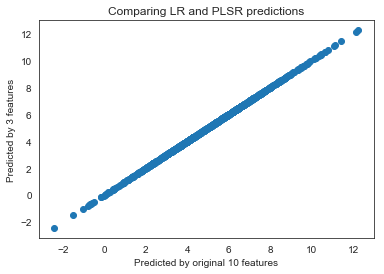

In [17]:
# Fit a linear model with all 10 features.
regr = linear_model.LinearRegression()
regr.fit(X, y)

# Save predicted values.
Y_pred = regr.predict(X)
print('R-squared regression:', regr.score(X, y))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls1 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls1.fit(X, y)

# Save predicted values.
Y_PLS_pred = pls1.predict(X)
print('R-squared PLSR:', pls1.score(X, y))

# Compare the predictions of the two models
plt.scatter(Y_pred,Y_PLS_pred) 
plt.xlabel('Predicted by original 10 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

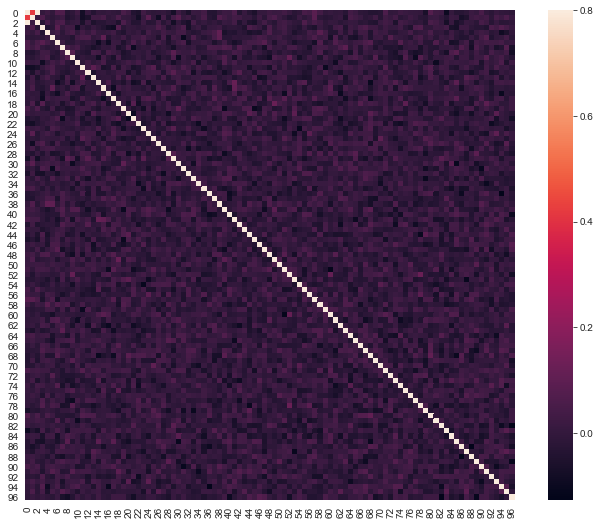

In [18]:
# Number of datapoints in outcome.
n1 = 750

# Number of features.
p1 = 96

# Create random normally distributed data for parameters.
X1 = np.random.normal(size=n1 * p1).reshape((n1, p1))

# Create normally distributed outcome related to parameters but with noise.
y1 = X1[:, 0] + 2 * X1[:, 1] + np.random.normal(size=n1 * 1) + 5



# Check out correlations. First column is the outcome.
f, ax = plt.subplots(figsize=(12, 9))
corrmat = pd.DataFrame(np.insert(X1, 0, y1, axis=1)).corr()

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

R-squared regression: 0.8465376331248522
R-squared PLSR: 0.8465376331248522


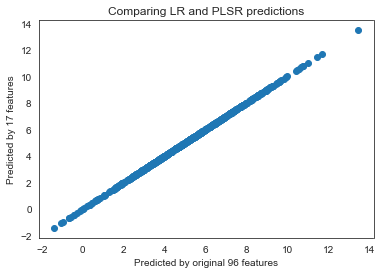

R-squared PLSR: 0.8454480356723502


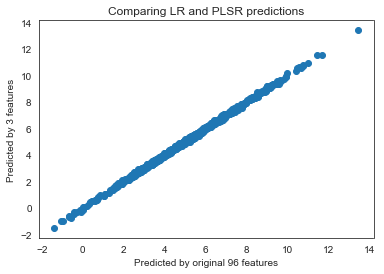

In [19]:
# Fit a linear model with all 96 features.
regr = linear_model.LinearRegression()
regr.fit(X1, y1)

# Save predicted values.
Y_pred96 = regr.predict(X1)
print('R-squared regression:', regr.score(X1, y1))

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 17 dimensions.
pls96 = PLSRegression(n_components=17)

# Reduce X to R(X) and regress on y.
pls96.fit(X1, y1)

# Save predicted values.
Y_PLS_pred96 = pls96.predict(X1)
print('R-squared PLSR:', pls96.score(X1, y1))

# Compare the predictions of the two models
plt.scatter(Y_pred96,Y_PLS_pred96) 
plt.xlabel('Predicted by original 96 features')
plt.ylabel('Predicted by 17 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()

# Fit a linear model using Partial Least Squares Regression.
# Reduce feature space to 3 dimensions.
pls961 = PLSRegression(n_components=3)

# Reduce X to R(X) and regress on y.
pls961.fit(X1, y1)

# Save predicted values.
Y_PLS_pred961 = pls961.predict(X1)
print('R-squared PLSR:', pls961.score(X1, y1))

# Compare the predictions of the two models
plt.scatter(Y_pred96,Y_PLS_pred961) 
plt.xlabel('Predicted by original 96 features')
plt.ylabel('Predicted by 3 features')
plt.title('Comparing LR and PLSR predictions')
plt.show()